In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

# データ分析ハンズオン - PyLadies Tokyo

## 使用するデータについて

大西洋に面するミーニョ地方で作られた `ヴィーニョ・ヴェルデ（Vinho Verde）` というワインの測定データを利用します．（ポルトガルワインの一種らしいです）

In [4]:
!head winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [5]:
# このページから演習に利用するデータをダウンロードしましょう
# データは赤ワイン・白ワインで分かれています．両方ダウンロードして下さい
# http://archive.ics.uci.edu/ml/datasets/Wine+Quality

# 赤ワインのデータを読み込んでみます
df = pd.read_csv('winequality-red.csv', sep=';')

## データの中身を確認する

In [6]:
# データの上から5行を確認してみましょう
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


各カラムの意味は以下の通りです

- fixed acidity: 酒石酸濃度
- volatile acidity: 酢酸濃度
- citric acid: クエン酸濃度
- residual sugar: 残留糖分濃度
- chlorides: 塩化ナトリウム濃度
- free_sulfur_dioxide: 遊離亜硫酸濃度
- total sulfur dioxide: 総亜硫酸濃度
- density: 密度
- pH: pH
- sulphates: 硫酸カリウム濃度
- alcohol: アルコール度数
- quality: ワインの味（グレード）

In [7]:
# データの基礎統計量について確認してみましょう
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- データの数はどうなっていますか？
- 予測したいデータはどのような形式になっているでしょうか？

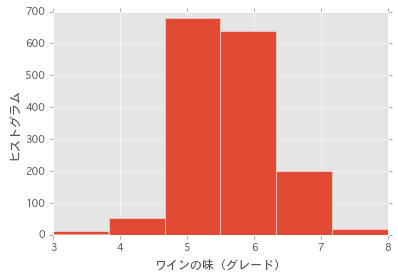

In [8]:
# 予測したいデータの分布を確認してみましょう
# ヒストグラムを使ってみましょう
df.quality.hist(range=(3, 8), bins=6)

plt.xlabel('ワインの味（グレード）')
plt.ylabel('ヒストグラム')

扱うデータの分布はどうなっているでしょうか？

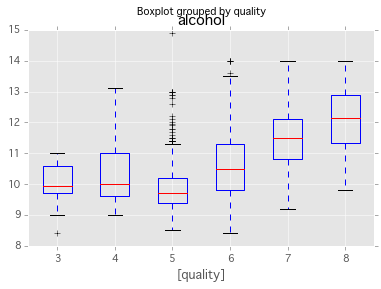

In [9]:
# アルコール度数とワインの味の関係について確認してみましょう
# boxplotを使ってみましょう

df[['alcohol', 'quality']].boxplot(by='quality')

ワインの味とアルコール度数の関係はどうなっているでしょうか？

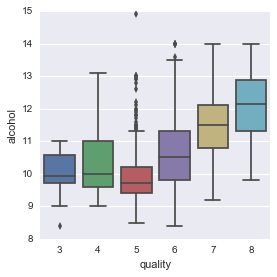

In [10]:
# seabornのfactorplotを利用するともっと簡単に書ける

import seaborn as sns

sns.factorplot(x='quality', y='alcohol', data=df, kind='box')

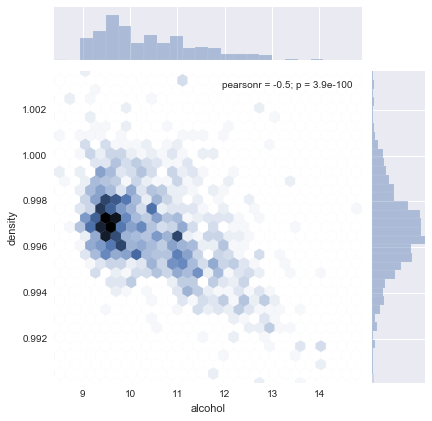

In [11]:
sns.jointplot(x='alcohol', y='density', kind='hex', data=df)

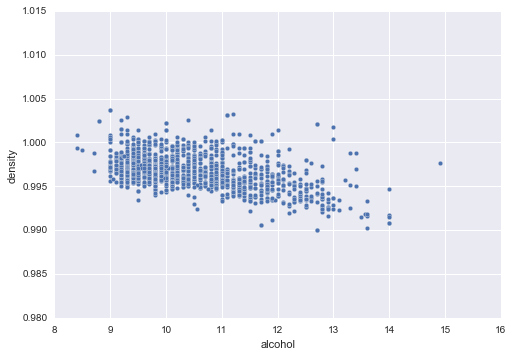

In [12]:
df.plot(kind='scatter', x='alcohol', y='density')

In [13]:
# アルコール度数以外の項目についても boxplot で確認してみましょう．ワインの味に寄与している要素はあるでしょうか？


## ワインのクオリティを予測してみよう

これらのデータを利用して，ワインのクオリティを予測してみましょう

In [14]:
from sklearn.cross_validation import train_test_split

train_df, test_df = train_test_split(df, test_size=0.33)

In [15]:
# 訓練データ，テストデータのそれぞれのサイズを確認してみよう
print(train_df.shape)
print(test_df.shape)

(1071, 12)
(528, 12)


In [16]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
from sklearn.svm import SVR

# SVRアルゴリズムを利用してワインのクオリティを推測するルールを学習してみよう
model = SVR()

# model.fit(X, y)
model.fit(train_df.drop('quality', axis=1), train_df['quality'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
# 作成したモデルを利用してワインのクオリティを予測してみよう
y_pred = model.predict(test_df.drop('quality', axis=1))
y_pred[:10]

array([ 5.1002067 ,  5.36008037,  5.51618413,  5.88153981,  5.81396397,
        5.09753763,  5.07745004,  5.50137311,  5.95321135,  5.17422415])

In [25]:
# 予測した結果を評価してみよう
100 * model.score(test_df.drop('quality', axis=1), test_df['quality'])

24.09313300501449

In [31]:
answer_df = pd.DataFrame(y_pred, columns=['y_pred'])
answer_df.head()

,y_pred
0,5.100207
1,5.360080
2,5.516184
3,5.881540
4,5.813964


In [40]:
correct_df = pd.DataFrame(test_df['quality']).reset_index()
correct_df = correct_df.drop('index', axis=1)
correct_df.head()

,quality
0,5
1,4
2,6
3,3
4,6


In [42]:
compare_df = answer_df.join(correct_df)
compare_df.head()

,y_pred,quality
0,5.100207,5
1,5.360080,4
2,5.516184,6
3,5.881540,3
4,5.813964,6


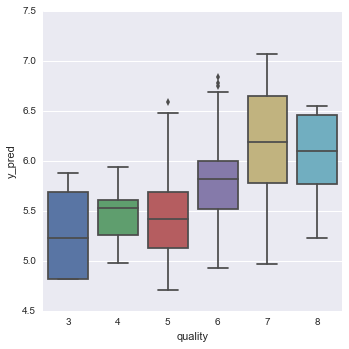

In [46]:
sns.factorplot(x='quality', y='y_pred', data=compare_df, kind='box', size=5)

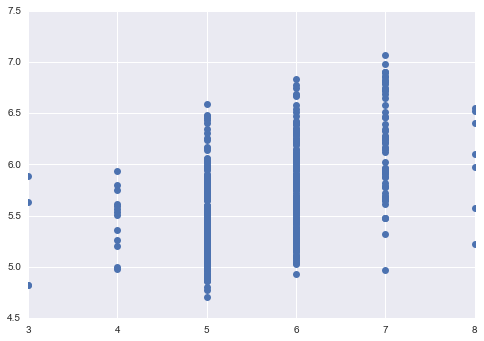

In [27]:
plt.plot(test_df['quality'], y_pred, 'o')